In [20]:
import numpy as np
from matplotlib import pyplot as plt
import keras
import cv2
from PIL import Image
from keras.datasets import cifar10
from keras.layers import MaxPool2D, Convolution2D, Input, Dense, Flatten, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils 

import json
from keras.preprocessing.image import load_img, img_to_array
import h5py
from keras.applications import vgg16

In [2]:
vgg16.VGG16?

In [21]:
class_index_path = '../Transfer-Learning/imagenet_class_index.json'
class_index = json.load(open(class_index_path))


In [22]:
model = vgg16.VGG16(weights='imagenet',include_top=True,input_shape=(224,224,3))


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [57]:
# def preprocess_image(image):
#     image = image[:,:,:,::-1]
#     image[:, :, :, 0] -= 103.939 #zero-centering the data
#     image[:, :, :, 1] -= 116.779
#     image[:, :, :, 2] -= 123.68
#     return image

# def load_image(path):
#     image_data = (np.asarray(Image.open(path)).astype(float)) 
                
# #     img = image.load_img(path,target_size=(224,224,3))
# #     img = image.img_to_array(img)
#     print(image_data.shape)
#     image_data.resize(224,224,3)
#     img = np.asarray(image_data)
#     print(img.shape)
#     img = np.expand_dims(img,axis=0)
#     print(img.shape)
#     img = preprocess_image(img)
#     return img

In [24]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224,224,3))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg16.preprocess_input(img)
    return img

def deprocess_image(x):
    x = x.reshape((img_height,img_width,3))
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:,:,::-1]
    x = np.clip(x,0,255).astype('uint8')
    return x

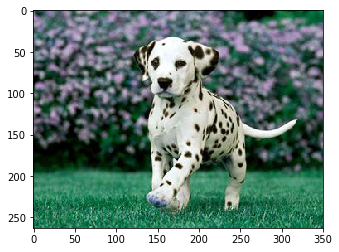

In [25]:
img = cv2.imread('dalmation.jpg')
plt.imshow(img,cmap='gray')
plt.show()

In [28]:
im = preprocess_image('dalmation.jpg')

In [81]:
# plt.imshow(im.reshape(,cmap='gray')
# plt.show()

In [29]:
pred = model.predict(im)
pred.argmax()

251

In [10]:
# print(pred.shape)
# print(pred)

In [31]:
result = []
for ix in range(int(pred.shape[1])):
#     print(class_index[str(ix)][1])
    result.append((class_index[str(ix)][1],pred[0,ix]))
#     result.append((class_index[str(ix)][1], pred[0, ix]))

In [78]:
# print(class_index)

In [33]:
ans = sorted(result,key=lambda x:x[1],reverse=True)
# print(ans[:5])

In [34]:
print('The Image is of a %s' %ans[0][0])

The Image is of a dalmatian
